In [7]:
import torch 
from quantizers.quantizer import VoronoiQuantizer
import numpy as np
train_y = np.load("/home/halil/max_quantile/data/raw/Concrete_Compressive_Strength/all_data.npy",allow_pickle=True).item()["train_y"]
quantizer = VoronoiQuantizer(train_y, 50)

load_file = torch.load("/home/halil/max_quantile/logs/Concrete_Compressive_Strength/voronoi/20240919-211211/quantizer.pth")

quantizer.load_state_dict(load_file)




<All keys matched successfully>

In [10]:
def boundary_clipped_voronoi_areas_1d(points, boundaries):
    # Ensure points is a 1D array
    points = np.sort(points.flatten())
    a, b = boundaries
    n = len(points)

    # Calculate midpoints between sorted points
    midpoints = (points[:-1] + points[1:]) / 2  # Shape: (n - 1,)

    # Initialize left and right boundaries for each Voronoi cell
    left = np.empty(n)
    right = np.empty(n)

    # Set left boundaries
    left[0] = a
    left[1:] = midpoints  # Left boundaries for points 1 to n-1

    # Set right boundaries
    right[:-1] = midpoints  # Right boundaries for points 0 to n-2
    right[-1] = b

    # Clip left and right boundaries to the overall boundaries [a, b]
    left_clipped = np.clip(left, a, b)
    right_clipped = np.clip(right, a, b)

    return left_clipped, right_clipped


left, right = boundary_clipped_voronoi_areas_1d(quantizer.protos.detach().numpy(),torch.tensor(quantizer.outer_hull))

In [11]:
left

tensor([-2.4405, -2.4099, -2.3512, -2.2968, -2.1193, -1.8952, -1.7595, -1.6526,
        -1.5379, -1.3967, -1.2804, -1.2076, -1.1132, -0.9986, -0.8807, -0.7506,
        -0.6408, -0.5496, -0.4255, -0.2835, -0.1774, -0.0684,  0.0551,  0.1739,
         0.2736,  0.3577,  0.4737,  0.5958,  0.7176,  0.8492,  0.9600,  1.0509,
         1.1464,  1.2918,  1.4301,  1.5308,  1.6503,  1.7672,  1.8715,  1.9823,
         2.0868,  2.2274,  2.3505,  2.4375,  2.5521,  2.6850,  2.9042,  3.0802,
         3.1392,  3.1991], dtype=torch.float64)

In [12]:
right

tensor([-2.4099, -2.3512, -2.2968, -2.1193, -1.8952, -1.7595, -1.6526, -1.5379,
        -1.3967, -1.2804, -1.2076, -1.1132, -0.9986, -0.8807, -0.7506, -0.6408,
        -0.5496, -0.4255, -0.2835, -0.1774, -0.0684,  0.0551,  0.1739,  0.2736,
         0.3577,  0.4737,  0.5958,  0.7176,  0.8492,  0.9600,  1.0509,  1.1464,
         1.2918,  1.4301,  1.5308,  1.6503,  1.7672,  1.8715,  1.9823,  2.0868,
         2.2274,  2.3505,  2.4375,  2.5521,  2.6850,  2.9042,  3.0802,  3.1392,
         3.1991,  3.2297], dtype=torch.float64)

In [ ]:
left = torch.concatenat(left,right[-1])

In [14]:
quantizer.protos.min()

tensor(-2.4405, grad_fn=<MinBackward1>)

ValueError: `bins` must be 1d, when an array

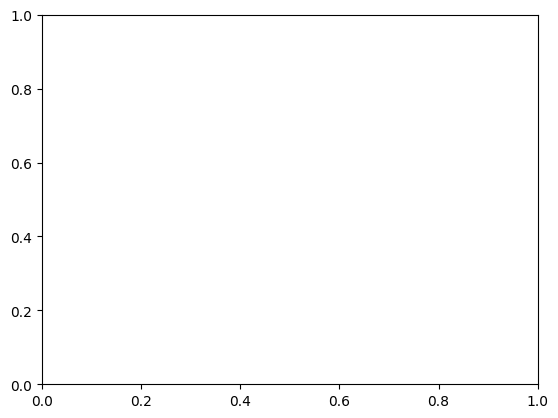

In [8]:
import matplotlib.pyplot as plt

plt.hist(train_y,  = quantizer.protos.detach().numpy(), alpha=0.5)

(array([ 1.,  4.,  7., 13., 13., 15., 23., 24., 26., 26., 16., 14., 24.,
        38., 29., 23., 18., 27., 33., 43., 21., 25., 34., 31., 35., 23.,
        29., 15., 10., 17., 18., 20., 13., 18., 11.,  7., 12.,  7.,  5.,
         9., 10.,  7.,  3.,  8.,  2.,  5.,  2.,  4.,  4.,  2.]),
 array([-1.96801594, -1.87351165, -1.77900737, -1.68450308, -1.58999879,
        -1.49549451, -1.40099022, -1.30648593, -1.21198164, -1.11747736,
        -1.02297307, -0.92846878, -0.8339645 , -0.73946021, -0.64495592,
        -0.55045164, -0.45594735, -0.36144306, -0.26693877, -0.17243449,
        -0.0779302 ,  0.01657409,  0.11107837,  0.20558266,  0.30008695,
         0.39459123,  0.48909552,  0.58359981,  0.6781041 ,  0.77260838,
         0.86711267,  0.96161696,  1.05612124,  1.15062553,  1.24512982,
         1.33963411,  1.43413839,  1.52864268,  1.62314697,  1.71765125,
         1.81215554,  1.90665983,  2.00116411,  2.0956684 ,  2.19017269,
         2.28467698,  2.37918126,  2.47368555,  2.56818984,

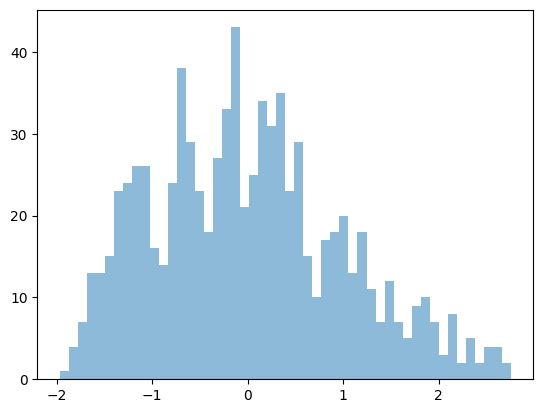

In [15]:
quantizer.get_areas()

tensor([0.0306, 0.0587, 0.0544, 0.1775, 0.2242, 0.1356, 0.1070, 0.1146, 0.1412,
        0.1163, 0.0728, 0.0944, 0.1146, 0.1179, 0.1301, 0.1098, 0.0911, 0.1241,
        0.1420, 0.1060, 0.1091, 0.1234, 0.1189, 0.0996, 0.0842, 0.1160, 0.1221,
        0.1217, 0.1317, 0.1108, 0.0909, 0.0955, 0.1454, 0.1384, 0.1007, 0.1195,
        0.1170, 0.1043, 0.1108, 0.1045, 0.1406, 0.1231, 0.0870, 0.1146, 0.1330,
        0.2192, 0.1759, 0.0591, 0.0599, 0.0306], dtype=torch.float64)